In [1]:
import os
import glob

import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from CCio   import load_power_file
from CCio   import load_metadata_from_filename
from CCcore import process_power

from CCplot import auto_plot_style
from CCplot import labels
from CCplot import plot1d

In [2]:
%matplotlib inline

auto_plot_style()

In [11]:
def load(folder):
    dfs = []

    for filename in glob.glob(os.path.join(folder, "*power*")):
        if len(open(filename).read()) < 2: continue
        meta = load_metadata_from_filename(filename)
        if meta.ex_wl == 400 and meta.mono_grating == 1: continue
        t, p = process_power(*load_power_file(filename), 0.9)
        df   = pd.DataFrame(dict( time  = [t]
                                , power = [p]
                                , **vars(meta)
                                ))
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True, sort=False).reset_index(drop=True)

In [13]:
folder = "/home/gonzalo/data/CC/test_2021_04_27_19_12_34_601600/"
data   = load(folder)
exwls  = np.arange(800, 240, -10)

In [15]:
for exp, df in data.groupby("exposure"):
    plt.plot(exwls, df.power, label=str(exp))
    plt.xlabel("ex wl (nm)")
    plt.ylabel("Power (W)")
plt.legend()
    
plt.tight_layout()

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


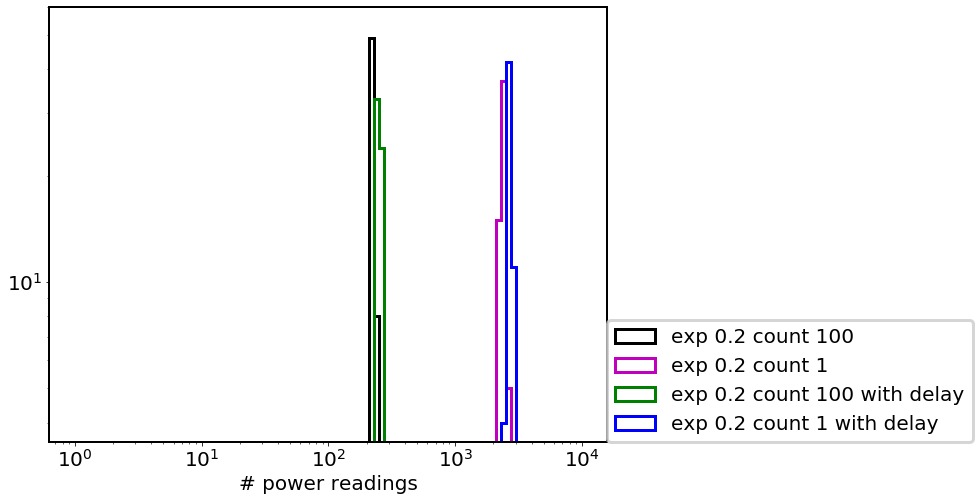

In [65]:
bins = np.logspace(0, 4, 101)
for exp, data1, data2, data3, data4 in zip(exps, *datas):
    npoints1 = [len(d[1].power) for d in data1]
    npoints2 = [len(d[1].power) for d in data2]
    npoints3 = [len(d[1].power) for d in data3]
    npoints4 = [len(d[1].power) for d in data4]
    plt.hist(npoints1, bins, histtype="step", label=f"exp {exp} count 100")
    plt.hist(npoints2, bins, histtype="step", label=f"exp {exp} count 1")
    plt.hist(npoints3, bins, histtype="step", label=f"exp {exp} count 100 with delay")
    plt.hist(npoints4, bins, histtype="step", label=f"exp {exp} count 1 with delay")
    plt.xlabel("# power readings")
    break
plt.xscale("log")
plt.yscale("log")
plt.ylim(0, 60)
plt.legend(loc=(1.0, 0.0));

In [68]:
for color, data in zip("kmgb", datas):
    for (_, d) in data[2]:
        plt.plot(d.time - d.time.min(), d.power/d.power.max(), "." + color)
        plt.yscale("log")

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

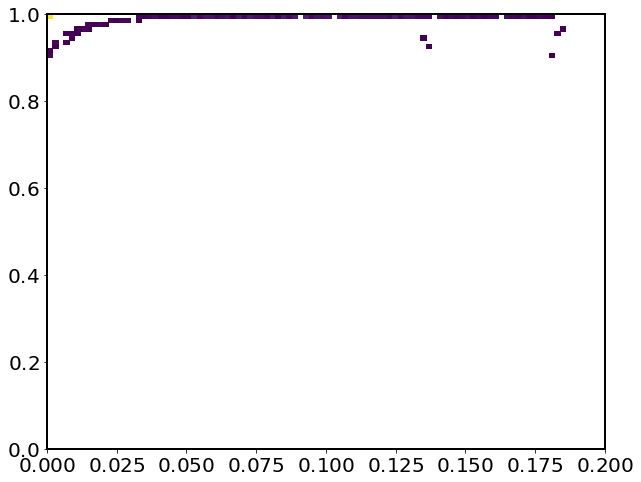

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [60]:
for color, data in zip("kmgb", datas):
    plt.figure()
    t = []
    p = []
    for (_, d) in data[0]:
        t.extend(d.time - d.time.min())
        p.extend(d.power/d.power.max())
        
    plt.figure()
    plt.hist2d(t, p, (np.linspace(0, 0.2, 101), np.linspace(0, 1, 101)), cmin=1)

In [ ]:
import time

In [19]:
%%timeit
time.time()

90 ns ± 1.03 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [26]:
import time

In [20]:
t0 = time.time()
n = 0
while time.time() - t0 < 10:
    time.time()
    [].append(1)
    time.sleep(0)
    n += 1
t1 = time.time()
print((t1 - t0) / n)

1.238245780568704e-06
